In [1]:
import pandas as pd
import plotly.express as px
import probscale
import matplotlib.pyplot as plt

In [3]:
data_frame = pd.read_csv('geologia.csv', sep=';')
data_frame

,Este (m),Norte (m),Cota (m),CuT (%),Fe (%),Mo (%),As (%),Zn (%),CuS (%),RecCu (%),CuCo (%),Alteración,Mineralización
0,2.9,110.2,2021.3,1.67,2.23,0.013,0.009,0.016,0.17,76.0,33.1,Cuarzo-sericita,Alta pirita
1,85.3,71.2,1971.1,1.56,4.24,0.014,0.020,0.027,0.17,89.3,26.4,Cuarzo-sericita,Alta pirita
2,86.7,142.3,1940.6,0.59,1.20,0.008,0.008,0.173,0.07,53.8,28.9,Cuarzo-sericita,Alta pirita
3,97.0,172.9,2003.9,1.15,1.59,0.007,0.008,0.052,0.07,79.6,33.8,Cuarzo-sericita,Alta pirita
4,145.3,185.2,2005.6,0.83,1.34,0.007,0.013,0.092,0.13,76.1,30.7,Cuarzo-sericita,Alta pirita
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,3697.8,1203.3,2201.8,0.52,3.27,0.004,0.033,0.019,0.08,82.4,23.3,Cuarzo-sericita,Alta pirita
1108,3698.1,879.7,2038.5,0.47,1.90,0.007,0.006,0.095,0.04,73.0,25.1,Cuarzo-sericita,Alta pirita
1109,3740.9,1151.5,2149.7,0.59,2.87,0.004,0.008,0.060,0.10,78.1,24.9,Cuarzo-sericita,Alta pirita
1110,3750.1,1002.7,2200.6,1.27,2.08,0.012,0.006,0.010,0.07,88.8,29.5,Potásico,Alta pirita


# Estatística descritiva

In [19]:
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
Este (m),1112.0,1958.751709,794.261590,2.900,1384.700,1947.750,2580.30000,3836.200
Norte (m),1112.0,507.562770,261.795989,1.000,297.775,454.200,692.60000,1293.900
Cota (m),1112.0,1593.402608,244.754942,816.200,1457.250,1590.000,1744.15000,3497.300
CuT (%),1112.0,1.062851,0.592445,0.150,0.670,0.890,1.27000,5.220
Fe (%),1112.0,1.724137,1.399786,0.020,0.850,1.260,2.09250,13.480
Mo (%),1112.0,0.047107,0.052010,0.002,0.009,0.028,0.06825,0.419
As (%),1112.0,0.043220,0.074830,0.003,0.006,0.011,0.05000,1.020
Zn (%),1112.0,0.057011,0.115841,0.001,0.013,0.023,0.05200,2.147
CuS (%),1112.0,-0.665297,8.374707,-99.000,0.020,0.040,0.06000,1.020
RecCu (%),1112.0,87.943975,4.987164,53.600,85.600,88.700,91.40000,102.400


## Estadistica categorica
### Alteración

In [8]:
stats_by_alt = data_frame.groupby(['Alteración']).describe()
stats_by_alt['Fe (%)']

,count,mean,std,min,25%,50%,75%,max
Alteración,,,,,,,,
Cuarzo-sericita,574.0,2.140854,1.605002,0.02,1.1200,1.60,2.6550,13.48
Potásico,538.0,1.279535,0.959909,0.30,0.7125,0.96,1.4325,7.47


### Distribución acumulada por categoría para Fe

In [ ]:
from matplotlib.ticker import ScalarFormatter
figure, ax = plt.subplots(figsize=(10, 10))
for category in data_frame.groupby('Alteración').groups.keys():
    xData = data_frame.groupby('Alteración').get_group(category)['Fe (%)'].sort_values()
    probscale.probplot(xData, ax=ax, plottype='prob', probax='y', datascale='log', label=category)
ax.legend()
ax.set_ylim(bottom = 0.001, top = 99.999)
ax.set_xlim(left = 1e-4, right = 1e1)
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel('Ordered Values')
ax.set_ylabel('Normal probability scale (%)')
ax.set_title('Probability Plot')
plt.savefig('probplot.png')

### Distribución acumulada por categoría para Mo

In [ ]:
from matplotlib.ticker import ScalarFormatter
figure, ax = plt.subplots(figsize=(10, 10))
for category in data_frame.groupby('Alteración').groups.keys():
    xData = data_frame.groupby('Alteración').get_group(category)['Mo (%)'].sort_values()
    probscale.probplot(xData, ax=ax, plottype='prob', probax='y', datascale='log', label=category)
ax.legend()
ax.set_ylim(bottom = 0.001, top = 99.999)
ax.set_xlim(left = 1e-4, right = 1e1)
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel('Ordered Values')
ax.set_ylabel('Normal probability scale (%)')
ax.set_title('Probability Plot')
plt.savefig('probplot.png')

### Distribución acumulada por categoría para As

In [ ]:
from matplotlib.ticker import ScalarFormatter
figure, ax = plt.subplots(figsize=(10, 10))
for category in data_frame.groupby('Alteración').groups.keys():
    xData = data_frame.groupby('Alteración').get_group(category)['As (%)'].sort_values()
    probscale.probplot(xData, ax=ax, plottype='prob', probax='y', datascale='log', label=category)
ax.legend()
ax.set_ylim(bottom = 0.001, top = 99.999)
ax.set_xlim(left = 1e-4, right = 1e1)
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel('Ordered Values')
ax.set_ylabel('Normal probability scale (%)')
ax.set_title('Probability Plot')
plt.savefig('probplot.png')

### Distribución acumulada por categoría para Zn

In [ ]:
from matplotlib.ticker import ScalarFormatter
figure, ax = plt.subplots(figsize=(10, 10))
for category in data_frame.groupby('Alteración').groups.keys():
    xData = data_frame.groupby('Alteración').get_group(category)['Zn (%)'].sort_values()
    probscale.probplot(xData, ax=ax, plottype='prob', probax='y', datascale='log', label=category)
ax.legend()
ax.set_ylim(bottom = 0.001, top = 99.999)
ax.set_xlim(left = 1e-4, right = 1e1)
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel('Ordered Values')
ax.set_ylabel('Normal probability scale (%)')
ax.set_title('Probability Plot')
plt.savefig('probplot.png')

### Distribución acumulada por categoría para CuS

In [ ]:
from matplotlib.ticker import ScalarFormatter
figure, ax = plt.subplots(figsize=(10, 10))
for category in data_frame.groupby('Alteración').groups.keys():
    xData = data_frame.groupby('Alteración').get_group(category)['CuS (%)'].sort_values()
    probscale.probplot(xData, ax=ax, plottype='prob', probax='y', datascale='log', label=category)
ax.legend()
ax.set_ylim(bottom = 0.001, top = 99.999)
ax.set_xlim(left = 1e-4, right = 1e1)
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel('Ordered Values')
ax.set_ylabel('Normal probability scale (%)')
ax.set_title('Probability Plot')
plt.savefig('probplot.png')

### Visualizacion por categoría de alteración de leyes altas y bajas para Cuarto-Sericita

In [ ]:
data_frame_filtered = data_frame[(data_frame['Alteración'] == 'Cuarzo-sericita')]
figure = px.scatter_3d(data_frame_filtered, x = 'Este (m)', y = 'Norte (m)', z = 'Cota (m)', color = 'Fe (%)', color_continuous_scale = px.colors.sequential.Jet, range_color=[0.0, data_frame['Fe (%)'].quantile(0.95)])
figure.update_traces(marker=dict(size=5.0))
figure.show()

In [ ]:
data_frame_filtered = data_frame[(data_frame['Alteración'] == 'Cuarzo-sericita')]
figure = px.scatter_3d(data_frame_filtered, x = 'Este (m)', y = 'Norte (m)', z = 'Cota (m)', color = 'Mo (%)', color_continuous_scale = px.colors.sequential.Jet, range_color=[0.0, data_frame['Mo (%)'].quantile(0.95)])
figure.update_traces(marker=dict(size=5.0))
figure.show()

In [ ]:
data_frame_filtered = data_frame[(data_frame['Alteración'] == 'Cuarzo-sericita')]
figure = px.scatter_3d(data_frame_filtered, x = 'Este (m)', y = 'Norte (m)', z = 'Cota (m)', color = 'As (%)', color_continuous_scale = px.colors.sequential.Jet, range_color=[0.0, data_frame['As (%)'].quantile(0.95)])
figure.update_traces(marker=dict(size=5.0))
figure.show()

In [ ]:
data_frame_filtered = data_frame[(data_frame['Alteración'] == 'Cuarzo-sericita')]
figure = px.scatter_3d(data_frame_filtered, x = 'Este (m)', y = 'Norte (m)', z = 'Cota (m)', color = 'Zn (%)', color_continuous_scale = px.colors.sequential.Jet, range_color=[0.0, data_frame['Zn (%)'].quantile(0.95)])
figure.update_traces(marker=dict(size=5.0))
figure.show()

In [ ]:
data_frame_filtered = data_frame[(data_frame['Alteración'] == 'Cuarzo-sericita')]
figure = px.scatter_3d(data_frame_filtered, x = 'Este (m)', y = 'Norte (m)', z = 'Cota (m)', color = 'CuS (%)', color_continuous_scale = px.colors.sequential.Jet, range_color=[0.0, data_frame['CuS (%)'].quantile(0.95)])
figure.update_traces(marker=dict(size=5.0))
figure.show()

plt.savefig('probplot.png')
### Visualizacion por categoría de alteración de leyes altas y bajas para Potásico

In [ ]:
data_frame_filtered = data_frame[(data_frame['Alteración'] == 'Potásico')]
figure = px.scatter_3d(data_frame_filtered, x = 'Este (m)', y = 'Norte (m)', z = 'Cota (m)', color = 'Fe (%)', color_continuous_scale = px.colors.sequential.Jet, range_color=[0.0, data_frame['Fe (%)'].quantile(0.95)])
figure.update_traces(marker=dict(size=5.0))
figure.show()

In [ ]:
data_frame_filtered = data_frame[(data_frame['Alteración'] == 'Potásico')]
figure = px.scatter_3d(data_frame_filtered, x = 'Este (m)', y = 'Norte (m)', z = 'Cota (m)', color = 'Mo (%)', color_continuous_scale = px.colors.sequential.Jet, range_color=[0.0, data_frame['Mo (%)'].quantile(0.95)])
figure.update_traces(marker=dict(size=5.0))
figure.show()

In [ ]:
data_frame_filtered = data_frame[(data_frame['Alteración'] == 'Potásico')]
figure = px.scatter_3d(data_frame_filtered, x = 'Este (m)', y = 'Norte (m)', z = 'Cota (m)', color = 'As (%)', color_continuous_scale = px.colors.sequential.Jet, range_color=[0.0, data_frame['As (%)'].quantile(0.95)])
figure.update_traces(marker=dict(size=5.0))
figure.show()

In [ ]:
data_frame_filtered = data_frame[(data_frame['Alteración'] == 'Potásico')]
figure = px.scatter_3d(data_frame_filtered, x = 'Este (m)', y = 'Norte (m)', z = 'Cota (m)', color = 'Zn (%)', color_continuous_scale = px.colors.sequential.Jet, range_color=[0.0, data_frame['Zn (%)'].quantile(0.95)])
figure.update_traces(marker=dict(size=5.0))
figure.show()

In [ ]:
data_frame_filtered = data_frame[(data_frame['Alteración'] == 'Potásico')]
figure = px.scatter_3d(data_frame_filtered, x = 'Este (m)', y = 'Norte (m)', z = 'Cota (m)', color = 'CuS (%)', color_continuous_scale = px.colors.sequential.Jet, range_color=[0.0, data_frame['CuS (%)'].quantile(0.95)])
figure.update_traces(marker=dict(size=5.0))
figure.show()

## Estadistica segun mineralización para Mo

In [12]:
stats_by_mine = data_frame.groupby(['Mineralización']).describe()
stats_by_mine['Mo (%)']

,count,mean,std,min,25%,50%,75%,max
Mineralización,,,,,,,,
Alta pirita,648.0,0.065026,0.055931,0.002,0.022,0.050,0.095,0.419
Baja pirita,464.0,0.022082,0.032287,0.002,0.005,0.011,0.025,0.268


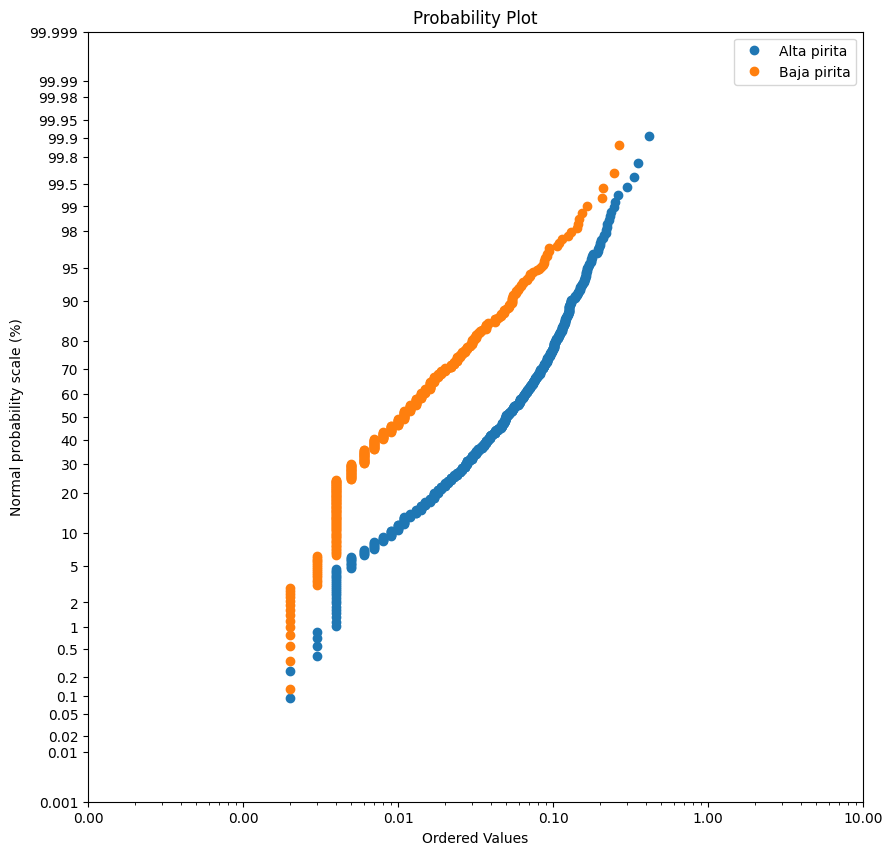

In [13]:
from matplotlib.ticker import ScalarFormatter
figure, ax = plt.subplots(figsize=(10, 10))
for category in data_frame.groupby('Mineralización').groups.keys():
    xData = data_frame.groupby('Mineralización').get_group(category)['Mo (%)'].sort_values()
    probscale.probplot(xData, ax=ax, plottype='prob', probax='y', datascale='log', label=category)
ax.legend()
ax.set_ylim(bottom = 0.001, top = 99.999)
ax.set_xlim(left = 1e-4, right = 1e1)
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel('Ordered Values')
ax.set_ylabel('Normal probability scale (%)')
ax.set_title('Probability Plot')
plt.savefig('probplot.png')

### Visualizacion por categoría de mineralización de leyes altas y bajas para Alta pirita en Mo

In [15]:
data_frame_filtered = data_frame[(data_frame['Mineralización'] == 'Alta pirita')]
figure = px.scatter_3d(data_frame_filtered, x = 'Este (m)', y = 'Norte (m)', z = 'Cota (m)', color = 'Mo (%)', color_continuous_scale = px.colors.sequential.Jet, range_color=[0.0, data_frame['Fe (%)'].quantile(0.95)])
figure.update_traces(marker=dict(size=5.0))
figure.show()

### Visualizacion por categoría de mineralización de leyes altas y bajas para Baja pirita en Mo

In [16]:
data_frame_filtered = data_frame[(data_frame['Mineralización'] == 'Baja pirita')]
figure = px.scatter_3d(data_frame_filtered, x = 'Este (m)', y = 'Norte (m)', z = 'Cota (m)', color = 'Mo (%)', color_continuous_scale = px.colors.sequential.Jet, range_color=[0.0, data_frame['Fe (%)'].quantile(0.95)])
figure.update_traces(marker=dict(size=5.0))
figure.show()